In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## importing data and dropping non-numerical values 

In [16]:
data = pd.read_csv('feature_matrix.csv')
data = data.select_dtypes(['number'])
data = data.drop(columns = ['strain'])

In [82]:
X = data.iloc[:, : -1]
y = data.iloc[:, [-1]]

## OLS

In [83]:
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor, X, y, cv = 5)
mse_average = np.mean(mse)
mse_average

-19.445842275703736

## Using LASSO

In [31]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV

In [81]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv = 5)
lasso_regressor.fit(X,y)
lasso_regressor.best_params_
lasso_regressor.best_score_


-0.4675744743136054

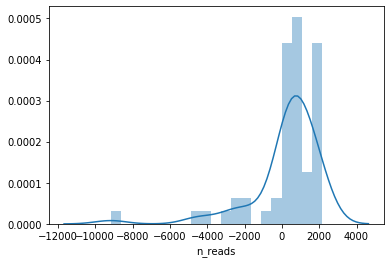

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 0)

prediction_lasso = lasso_regressor.predict(X_test)
prediction_lasso
y_test = y_test['n_reads']

sns.distplot(prediction_lasso-y_test)

# Other way (w/o GridSearch)

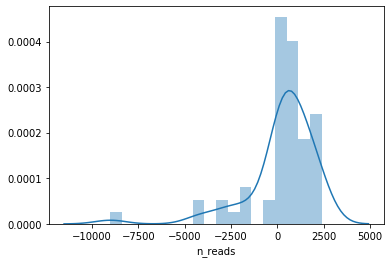

In [104]:
clf = Lasso()
clf.fit(X,y)
clf.score(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 0)
clf_prediction = clf.predict(X_test)
y_test = y_test['n_reads']

sns.distplot(clf_prediction-y_test)